# Importar bibliotecas necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Leer** el dataset y ver que columnas tiene

In [ ]:

df = pd.read_csv("test.csv")
print("Dimensiones del dataset:", df.shape)


Dimensiones del dataset: (999997, 21)


In [ ]:
print("\nColumnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['Age', 'Grade', 'Gender', 'Race', 'SES_Quartile', 'ParentalEducation', 'SchoolType', 'Locale', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport', 'Romantic', 'FreeTime', 'GoOut']


In [ ]:
print("\nTipos de datos por columna:")
print(df.dtypes)


Tipos de datos por columna:
Age                    int64
Grade                  int64
Gender                object
Race                  object
SES_Quartile           int64
ParentalEducation     object
SchoolType            object
Locale                object
TestScore_Math       float64
TestScore_Reading    float64
TestScore_Science    float64
GPA                  float64
AttendanceRate       float64
StudyHours           float64
InternetAccess         int64
Extracurricular        int64
PartTimeJob            int64
ParentSupport          int64
Romantic               int64
FreeTime               int64
GoOut                  int64
dtype: object


Tipos de respuesta por cada columna

In [ ]:
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())



Columna: Age
[15 16 17 14 18]

Columna: Grade
[10 11 12  9]

Columna: Gender
['Female' 'Male']

Columna: Race
['White' 'Hispanic' 'Black' 'Asian' 'Two-or-more' 'Other']

Columna: SES_Quartile
[1 2 3 4]

Columna: ParentalEducation
['HS' '<HS' 'Bachelors+' 'SomeCollege']

Columna: SchoolType
['Public' 'Private']

Columna: Locale
['City' 'Rural' 'Town' 'Suburban']

Columna: TestScore_Math
[72.34605284 77.88915721 72.9665874  ... 46.14595261 62.40048944
 79.83417406]

Columna: TestScore_Reading
[62.21713352 72.74802962 65.5854721  ... 57.0711744  68.00223222
 82.98662147]

Columna: TestScore_Science
[73.00807889 76.30371731 68.09941081 ... 64.63615493 68.1161362
 88.15385641]

Columna: GPA
[2.52174515 3.27562638 2.97413747 ... 1.76319753 2.58240797 3.84083689]

Columna: AttendanceRate
[0.86883604 0.90959528 0.87095158 ... 0.78370128 0.85693776 0.90116675]

Columna: StudyHours
[0.31017199 1.17558616 1.11255646 ... 0.26838816 1.03792731 1.13576649]

Columna: InternetAccess
[0 1]

Columna: E

In [ ]:
print("\nPrimeras filas del dataset:")
display(df.head())


Primeras filas del dataset:


,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,15,10,Female,White,1,HS,Public,City,72.346053,62.217134,...,2.521745,0.868836,0.310172,0,1,1,1,0,3,3
1,16,11,Female,Hispanic,1,<HS,Private,City,77.889157,72.748030,...,3.275626,0.909595,1.175586,1,1,0,0,1,3,1
2,17,12,Female,Black,2,HS,Public,Rural,72.966587,65.585472,...,2.974137,0.870952,1.112556,1,1,0,0,0,3,3
3,16,11,Female,White,2,HS,Public,Town,96.674049,88.035852,...,3.676590,1.000000,1.067679,0,0,0,0,1,4,5
4,16,11,Male,Black,3,Bachelors+,Public,Rural,81.989270,77.485372,...,2.255014,0.897957,0.841936,0,1,0,1,0,4,2


Porcentaje de valores


In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print("Porcentaje de valores nulos:")
print(porcentaje_nulos)

Valores nulos por columna:
Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64
Porcentaje de valores nulos:
Age                  0.0
Grade                0.0
Gender               0.0
Race                 0.0
SES_Quartile         0.0
ParentalEducation    0.0
SchoolType           0.0
Locale               0.0
TestScore_Math       0.0
TestScore_Reading    0.0
TestScore_Science    0.0
GPA                  0.0
AttendanceRate       0.0
StudyHours           0.0
InternetAccess       0.0
Extracurricular      0.0
PartTimeJob          0.0
ParentSupport        0.

Porcentaje de ceros

In [ ]:
porcentaje_ceros = (df.isin([0]).sum() / len(df)) * 100
print(porcentaje_ceros)


Age                   0.000000
Grade                 0.000000
Gender                0.000000
Race                  0.000000
SES_Quartile          0.000000
ParentalEducation     0.000000
SchoolType            0.000000
Locale                0.000000
TestScore_Math        0.000000
TestScore_Reading     0.000000
TestScore_Science     0.000000
GPA                   0.000000
AttendanceRate        0.000000
StudyHours            0.214101
InternetAccess       14.959745
Extracurricular      45.019135
PartTimeJob          81.939046
ParentSupport        57.722773
Romantic             79.993240
FreeTime              0.000000
GoOut                 0.000000
dtype: float64


4. Detección de outliers

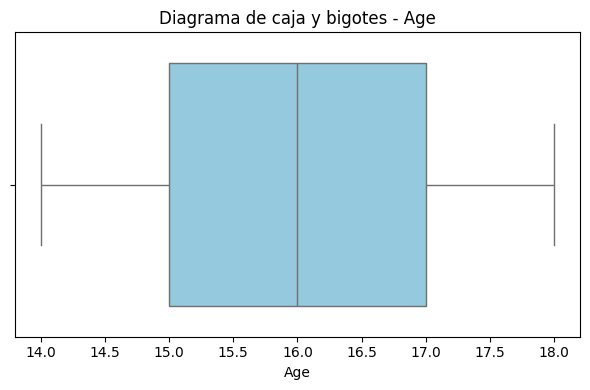

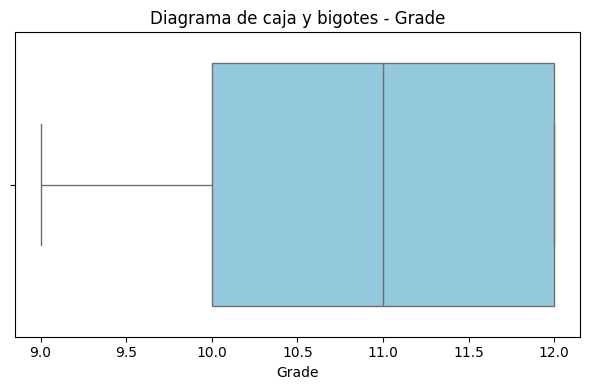

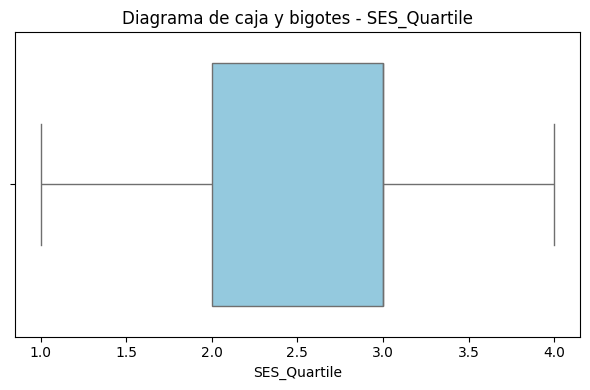

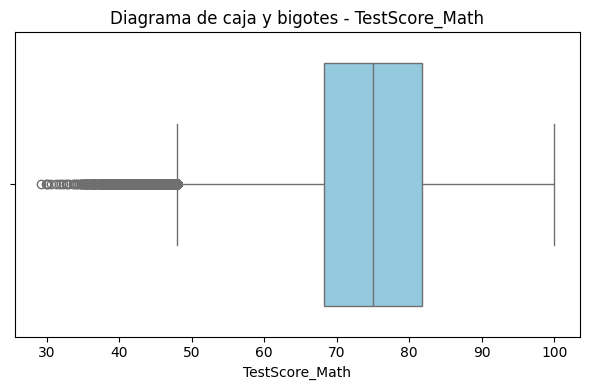

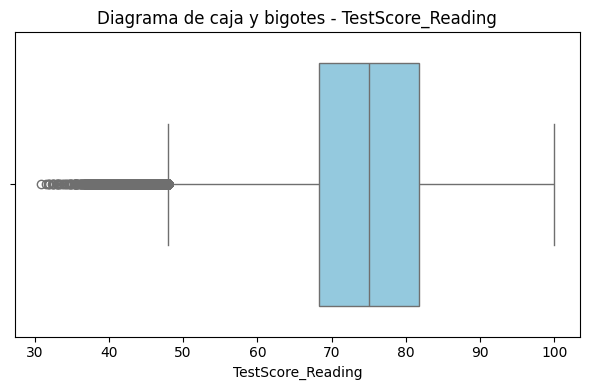

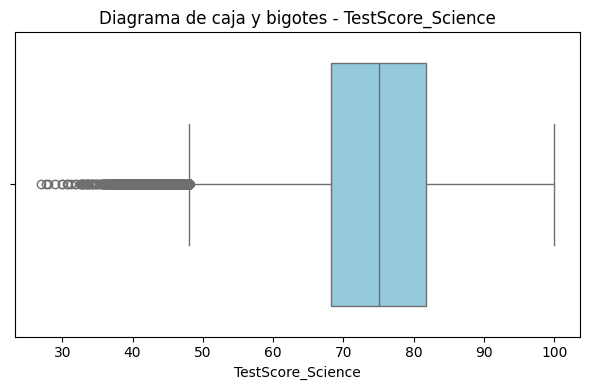

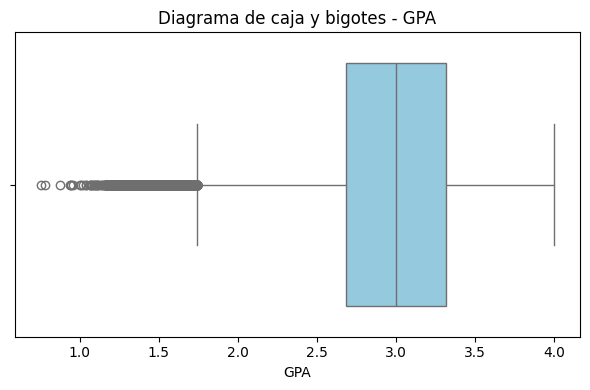

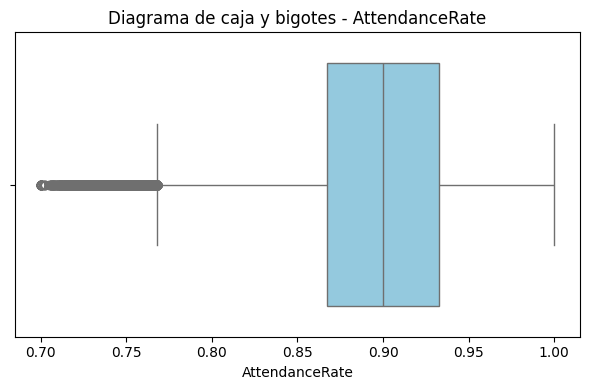

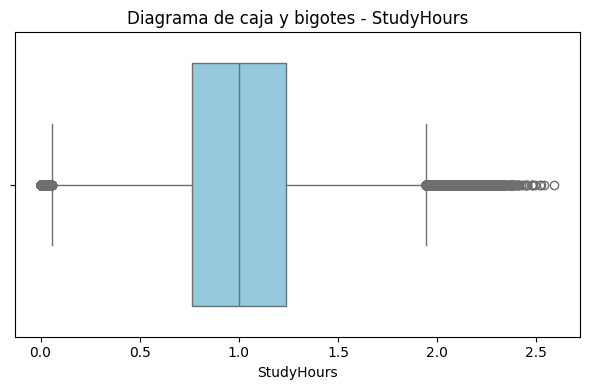

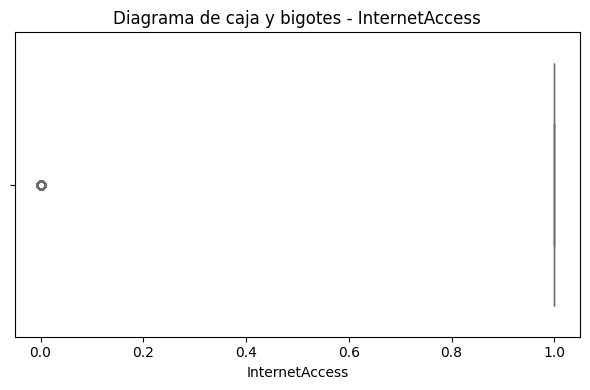

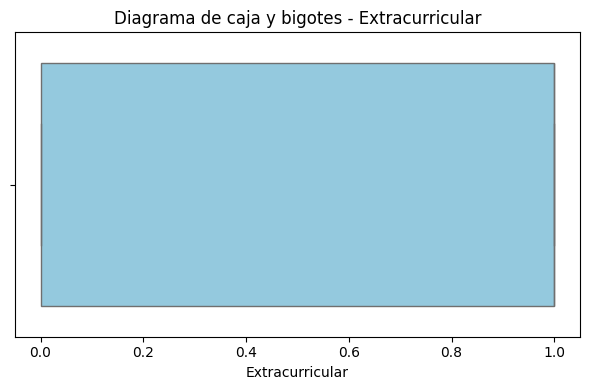

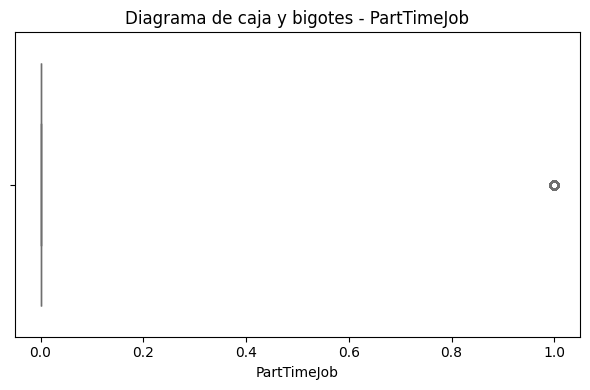

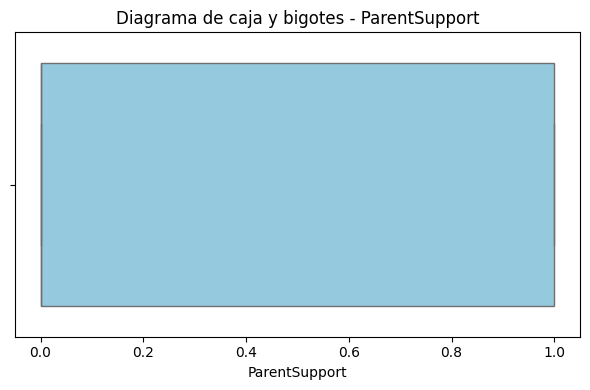

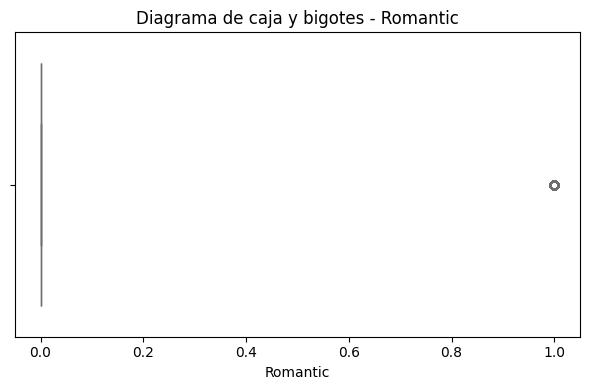

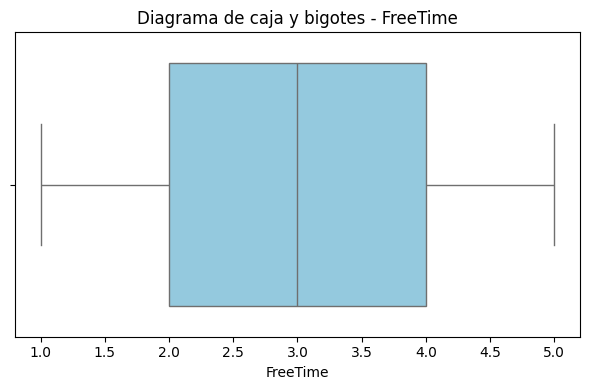

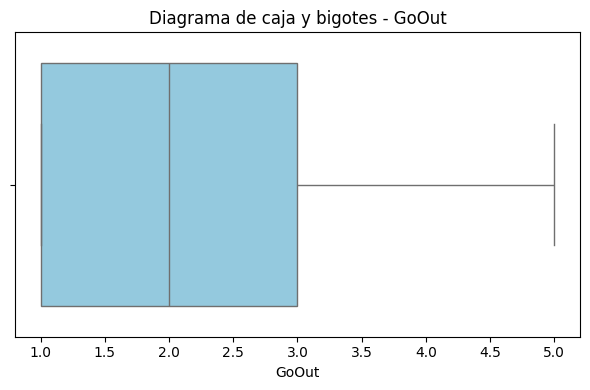

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Diagrama de caja y bigotes - {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


5. Exploracion de cada variable mediante histogramas

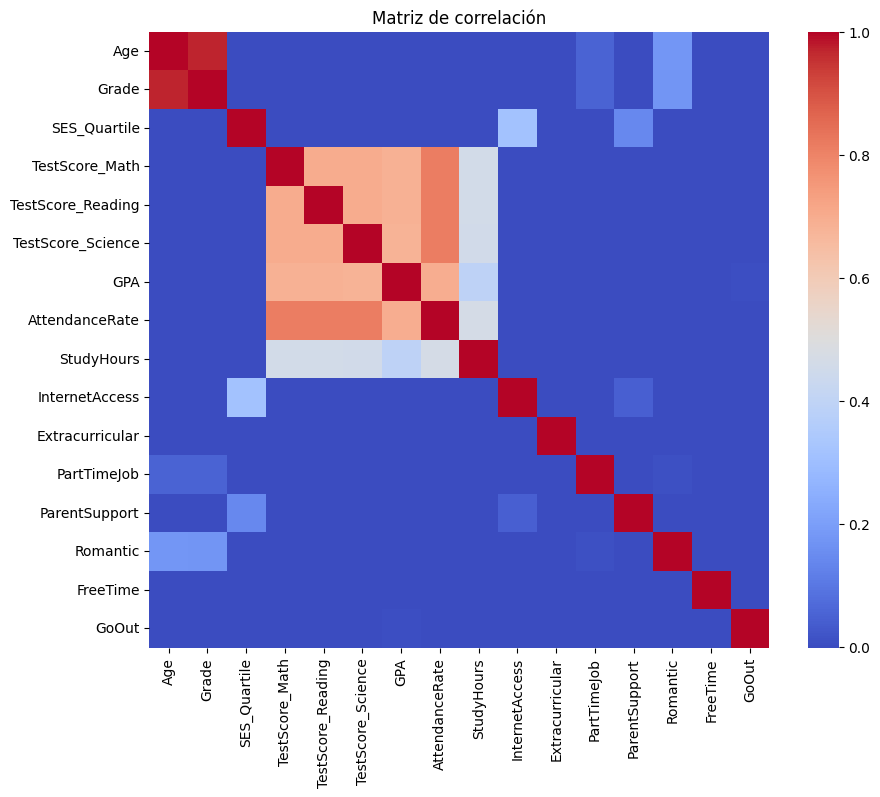

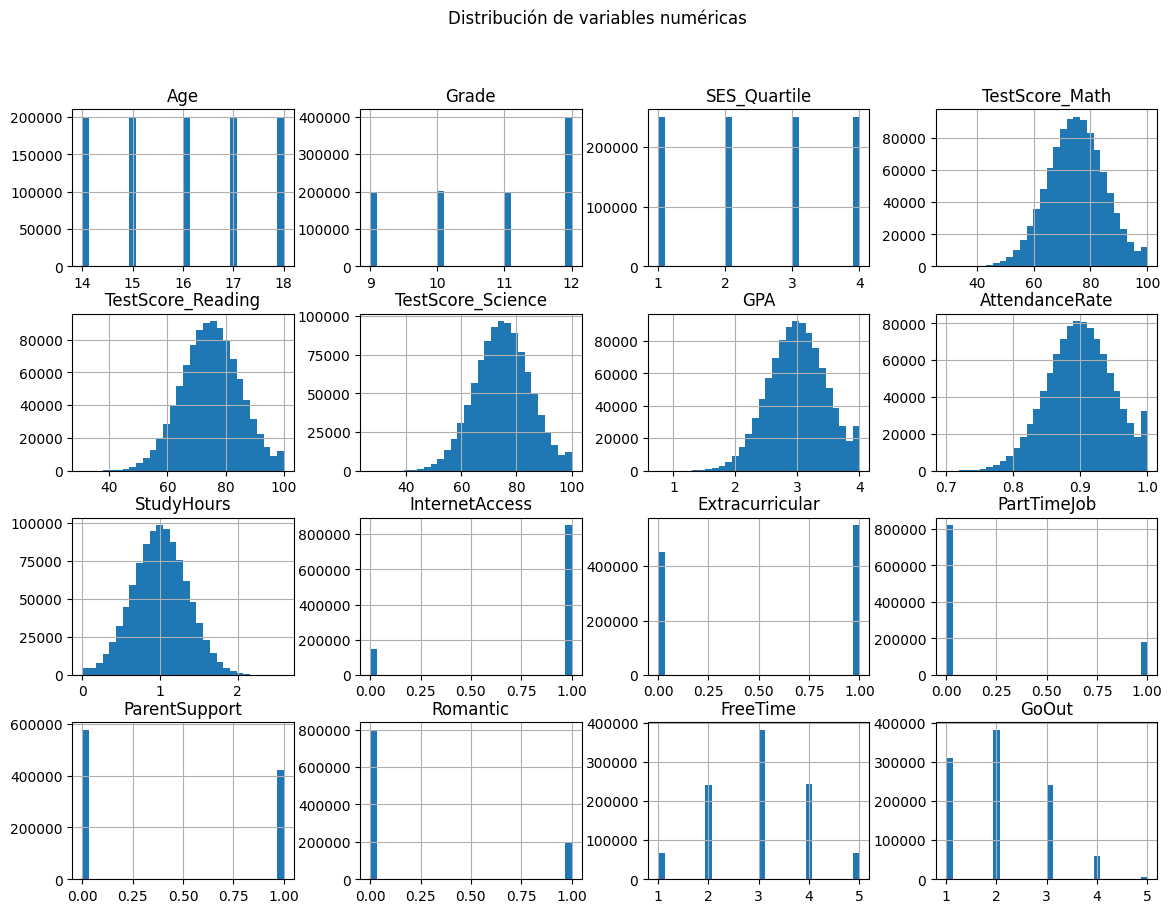

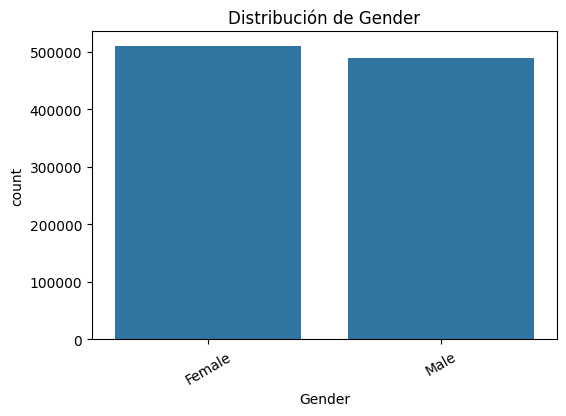

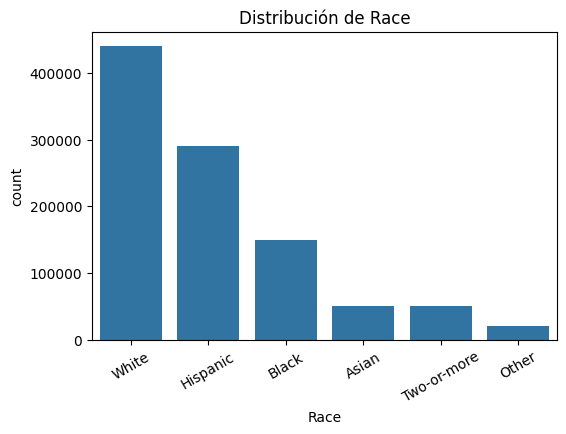

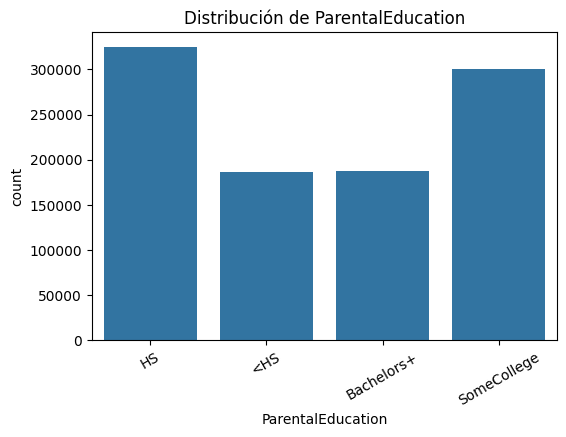

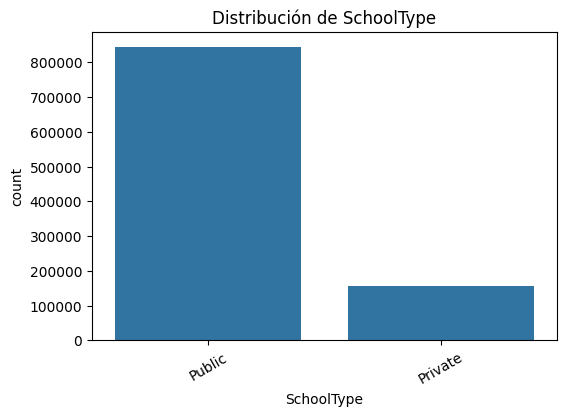

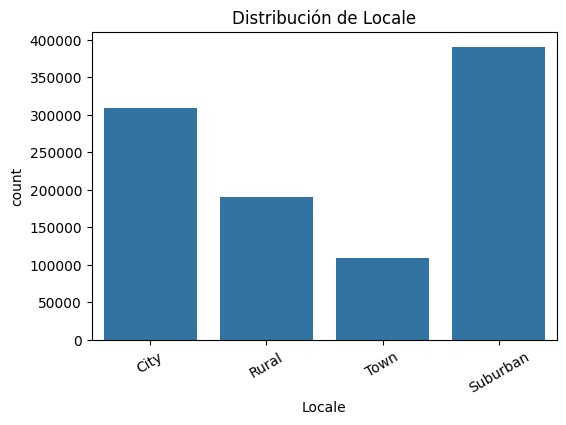

In [ ]:
# Correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de correlación")
plt.show()

# Histogramas de distribución
df[num_cols].hist(figsize=(14,10), bins=30)
plt.suptitle("Distribución de variables numéricas")
plt.show()

# Conteos de variables categóricas
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=30)
    plt.show()

# Visualización de variable a **predecir**

/tmp/ipython-input-1501651765.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('StudyHourRange')['TestScore_Math'].mean()


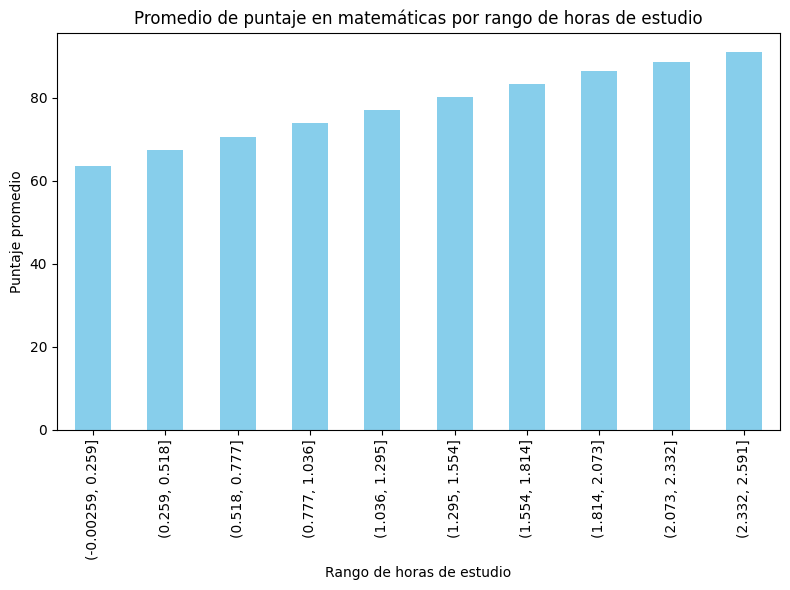

In [ ]:
# Crear rangos de horas (ejemplo: de 0 a 10 horas, en pasos de 1)
df['StudyHourRange'] = pd.cut(df['StudyHours'], bins=10)

# Agrupar por esos rangos
grouped = df.groupby('StudyHourRange')['TestScore_Math'].mean()

# Graficar
plt.figure(figsize=(8,6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Promedio de puntaje en matemáticas por rango de horas de estudio')
plt.xlabel('Rango de horas de estudio')
plt.ylabel('Puntaje promedio')
plt.tight_layout()
plt.show()



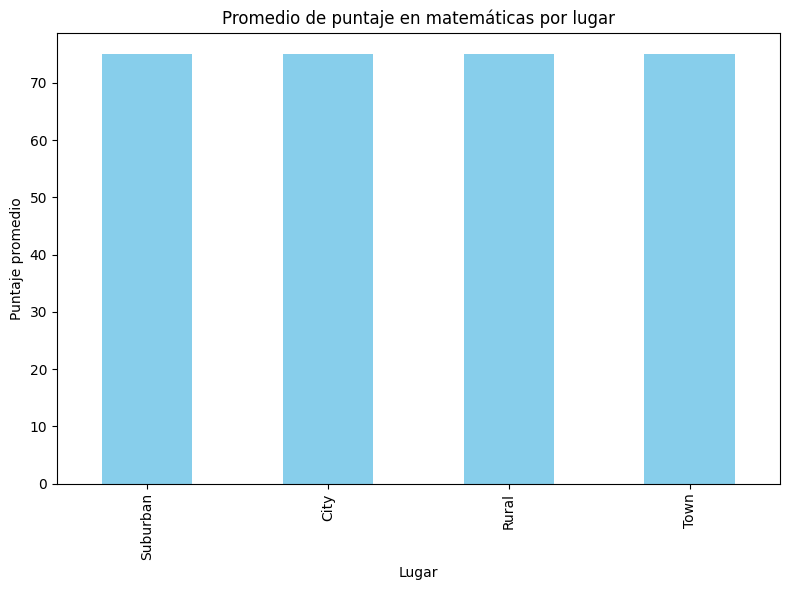

In [ ]:
grouped = df.groupby('Locale')['TestScore_Math'].mean().sort_values()

# Hacer el gráfico
plt.figure(figsize=(8,6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Promedio de puntaje en matemáticas por lugar')
plt.xlabel('Lugar')
plt.ylabel('Puntaje promedio')
plt.tight_layout()
plt.show()

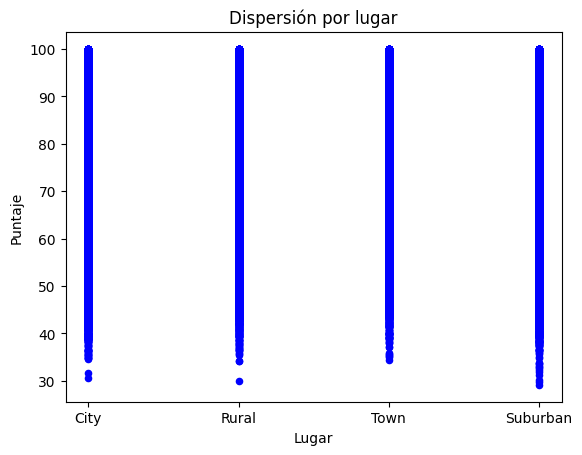

In [ ]:
df.plot(kind='scatter', x='Locale', y='TestScore_Math', color='blue')
plt.title('Dispersión por lugar')
plt.xlabel('Lugar')
plt.ylabel('Puntaje')
plt.show()


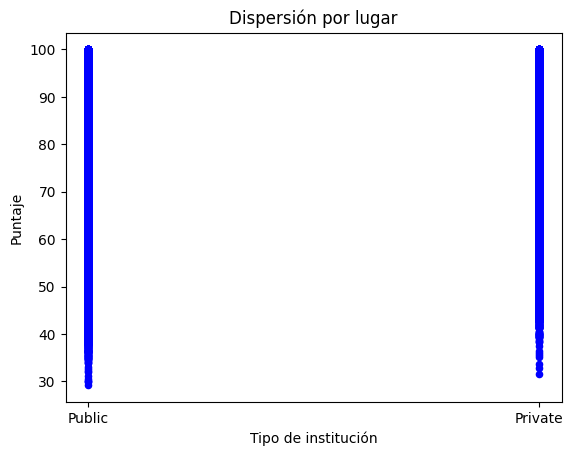

In [ ]:
df.plot(kind='scatter', x='SchoolType', y='TestScore_Math', color='blue')
plt.title('Dispersión por lugar')
plt.xlabel('Tipo de institución')
plt.ylabel('Puntaje')
plt.show()

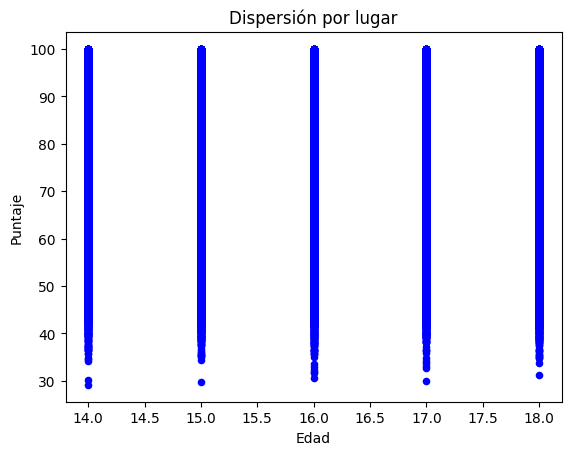

In [ ]:
df.plot(kind='scatter', x='Age', y='TestScore_Math', color='blue')
plt.title('Dispersión por lugar')
plt.xlabel('Edad')
plt.ylabel('Puntaje')
plt.show()

# **Características que no se usarán**

En este caso, no usaremos las columnas llamadas "TestScore_Reading" y "TestScore_Science", pues consideramos que no tienen ninguna relevancia a la hora de predecir la nota del examen de matemáticas ("TestScore_Math")

In [ ]:
df.drop(columns=['TestScore_Reading', 'TestScore_Science'], inplace=True)

# **KMeans**

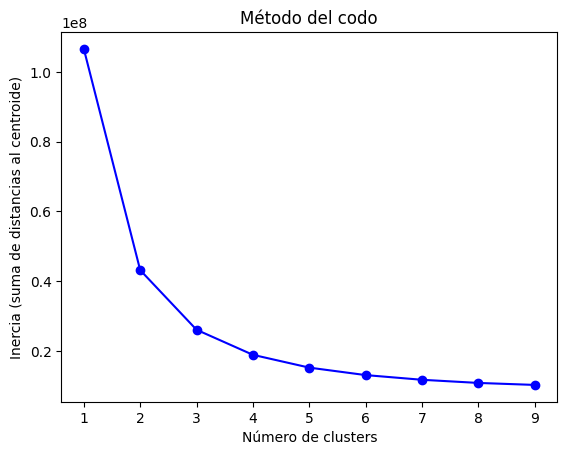

In [32]:
inertias = []
K = range(1, 10)
#df_numerico = df.select_dtypes(include=['number'])

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    #kmeans.fit(df_numerico[])
    kmeans.fit(df[['TestScore_Math', 'GPA', 'Age', 'Grade', 'SES_Quartile', 'AttendanceRate', 'StudyHours', 'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport', 'Romantic', 'FreeTime', 'GoOut']])
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (suma de distancias al centroide)')
plt.title('Método del codo')
plt.show()


Aplicando el metodo del codo, inferimos que la cantidad de clusters optimos es de 2, ya que acá se encuentra el "codo" de la grafica

In [37]:
##Aplicar kmeans
df_numerico = df.select_dtypes(include=['number'])

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_numerico)
df_numerico['cluster'] = kmeans.labels_

In [38]:
#Ver resultados
print("Centroides:")
print(kmeans.cluster_centers_)

Centroides:
[[15.99998792 10.79977966  2.5000856  66.96266085  2.74265301  0.86781762
   0.87120001  0.85024561  0.54933708  0.18046255  0.42267373  0.20054863
   3.00417713  2.07023381]
 [15.99840909 10.79932629  2.50047866 82.88647938  3.24734965  0.93086627
   1.1268827   0.85055732  0.55027369  0.1807545   0.42286945  0.19959323
   3.00165844  2.07468956]]


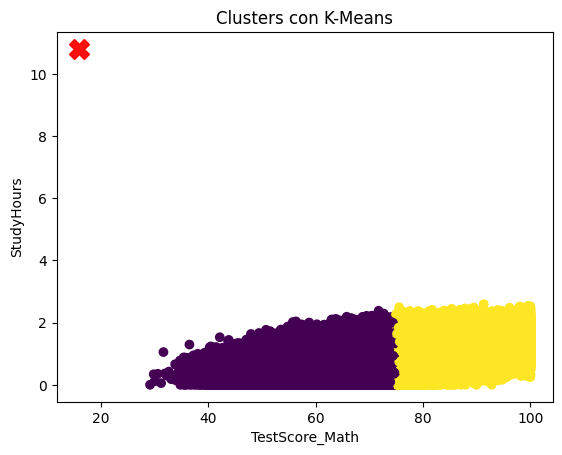

In [39]:
#Visualizar

plt.scatter(df_numerico['TestScore_Math'], df_numerico['StudyHours'], c=df_numerico['cluster'], cmap='viridis')
centros = kmeans.cluster_centers_
plt.scatter(centros[:,0], centros[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('TestScore_Math')
plt.ylabel('StudyHours')
plt.title('Clusters con K-Means')
plt.show()


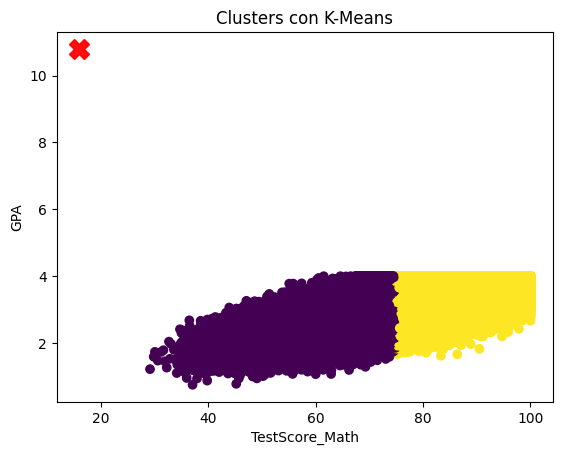

In [40]:
plt.scatter(df_numerico['TestScore_Math'], df_numerico['GPA'], c=df_numerico['cluster'], cmap='viridis')
centros = kmeans.cluster_centers_
plt.scatter(centros[:,0], centros[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('TestScore_Math')
plt.ylabel('GPA')
plt.title('Clusters con K-Means')
plt.show()

Una vez visualizado el modelo, es posible ver 2 clusters, que pueden ser identificados como los estudiantes con los puntajes más altos (Amarillo) y los estudiantes con los puntajes mas bajos (Morado). También se puede ver que el centroide (X roja) está fuera de lugar, alejado de los clusters. Esto se debe probablemente a datos atipicos, lo cual indica que es necesaria una limpieza de datos.